# Random Forest Classifier

In this notebook I utilize a random forest model to predict whether or not certain individuals income would be over or 
under 50k. In the first part of this notebook I go through an exercise of creating functions for calculating and showing 
descriptive statistics, and then doing some hypothesis testings. In the second part I go through the modelling process
splitting the data into a train and test split to evaluate the model performance, and then tune it to see the improvement
over the base model.

## Descriptive Analytics and Statistical Testing

###### Descriptive Analytics and Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
#Function to calculate descriptive statistics
def calc_engine(df, groupby_list, calc_columns, calcs):
    calculation_dict = {}

    for i in calc_columns:
        calculation_dict[i] = calcs
    
    final_df = df.copy()
    final_df = final_df[groupby_list]
    final_df.drop_duplicates(groupby_list, keep='first', inplace=True)

    for key, value in calculation_dict.items():
        groupby_df = data.groupby(groupby_list).agg({key: value}).reset_index()
        groupby_df.columns = [col if col in groupby_list else ''.join(col) for col in groupby_df.columns]
        final_df = pd.merge(final_df, groupby_df, on=groupby_list, how='inner')
        
    return final_df

In [3]:
#bar charts with income class frequency
def get_stacked_bar_charts(df, column1, target_variable):
    table=pd.crosstab(df[column1],df[target_variable])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title(f'Income Class Frequency by {column1}')
    plt.xlabel(column1)
    plt.ylabel(target_variable)
    return plt.show()

In [4]:
#import dataset
data = pd.read_excel(r'C:\Users\nickp\Desktop\data science\income classification.xlsx')
sns.set()
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#remove whitespaces from column names
print(data.columns)
data.columns = [col.strip() for col in data.columns]

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')


In [6]:
#Strip all whitespaces from columns
data = data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [7]:
#column types
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [8]:
#Rows and columns of data
data.shape

(30718, 15)

In [9]:
#Check nulls
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
#summary stats
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30718.000000,3.071800e+04,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.443584,1.898430e+05,10.130314,1106.037079,88.910216,40.949313
std,13.118227,1.054619e+05,2.562469,7497.863364,405.657203,11.985382
min,17.000000,0.000000e+00,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.373170e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
#Run correlation metrics
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1,-0.077,0.044,0.08,0.06,0.1
fnlwgt,-0.077,1,-0.044,-0.00019,-0.01,-0.023
education-num,0.044,-0.044,1,0.12,0.079,0.15
capital-gain,0.08,-0.00019,0.12,1,-0.032,0.08
capital-loss,0.06,-0.01,0.079,-0.032,1,0.054
hours-per-week,0.1,-0.023,0.15,0.08,0.054,1


In [12]:
#Define group by list, columns to analyze and the calculations to perform
categorical_columns = ['native-country','occupation', 'sex', 'income']
calculation_columns = ['age', 'capital-gain','capital-loss','hours-per-week']
calculations = ['min','max','mean', 'median', 'count']

#Run calculation function
calculations_df = calc_engine(data, categorical_columns, calculation_columns, calculations)
calculations_df.head()

,native-country,occupation,sex,income,agemin,agemax,agemean,agemedian,agecount,capital-gainmin,...,capital-lossmin,capital-lossmax,capital-lossmean,capital-lossmedian,capital-losscount,hours-per-weekmin,hours-per-weekmax,hours-per-weekmean,hours-per-weekmedian,hours-per-weekcount
0,United-States,Adm-clerical,Male,<=50K,17,79,35.135876,32.0,839,0,...,0,3770,74.374255,0.0,839,3,80,38.009535,40.0,839
1,United-States,Exec-managerial,Male,<=50K,18,90,40.437218,38.0,1107,0,...,0,2377,77.135501,0.0,1107,1,99,44.114724,40.0,1107
2,United-States,Handlers-cleaners,Male,<=50K,17,90,30.966119,27.0,974,0,...,0,2339,38.169405,0.0,974,2,95,37.584189,40.0,974
3,Cuba,Prof-specialty,Female,<=50K,28,68,50.400000,56.0,5,0,...,0,0,0.000000,0.0,5,8,52,37.000000,40.0,5
4,United-States,Exec-managerial,Female,<=50K,17,90,38.740741,38.0,810,0,...,0,4356,35.761728,0.0,810,3,99,40.845679,40.0,810


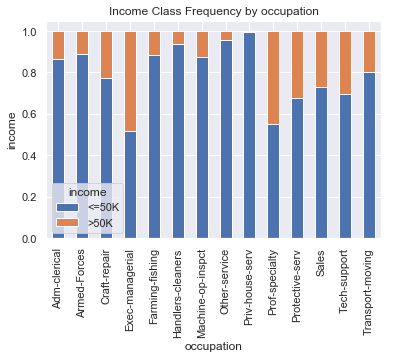

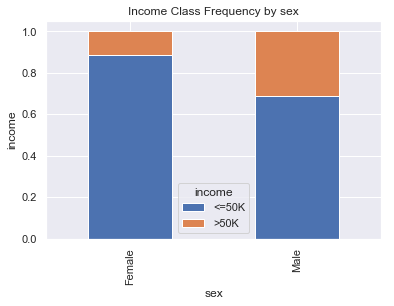

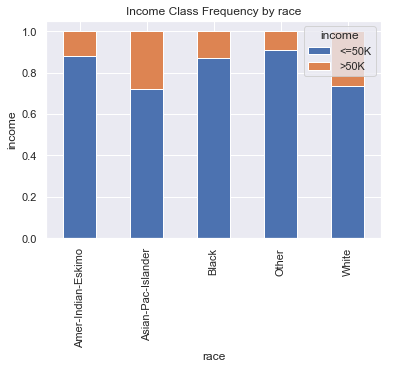

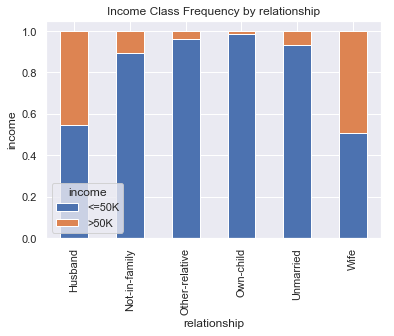

In [13]:
#Define target and other columns and run the bar charts function
y = 'income'
cat_columns = ['occupation', 'sex', 'race', 'relationship']

for i in cat_columns:
    get_stacked_bar_charts(data, i, y)

###### Hypothesis Testing

In [14]:
from scipy import stats

#Run chi squared test
for i in categorical_columns:
    contingency_table = pd.crosstab(data['income'], data[i])
    t, p, dof, expctd  = stats.chi2_contingency(contingency_table)
    print(f't:{t}, p: {p}, Dof {dof}')
    
#All categorical columns indicate that there is a relationship between that variable and income

t:317.75905900062014, p: 1.7533418315456657e-44, Dof 41
t:3744.8987583977073, p: 0.0, Dof 13
t:1440.421073000307, p: 0.0, Dof 1
t:30712.65317962293, p: 0.0, Dof 1


### Predictive Analytics

###### Model Setup

In [15]:
#import machine learning packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, f1_score, auc

In [16]:
#split training and test data
def get_train_test(df, y_var, x_vars, categoricals):
    x = df[x_vars]
    x = pd.get_dummies(x, columns=categoricals)
    y = df[y_var]
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=5, test_size=.2, shuffle=True)
    return x_train, x_test, y_train, y_test

In [17]:
#generate predictions
def get_predictions(x, model):
    preds = pd.DataFrame(model.predict(x))
    preds.rename(columns={0:'Predictions'}, inplace=True)
    return preds

In [18]:
#Function to run k fold cross validation
def get_cross_validation_results(df, n, categoricals, x_var, y_var):
    
    df_dummies = df.copy()
    df_dummies = df_dummies[x_var+[y_var]]
    df_dummies = pd.get_dummies(df_dummies, columns=categoricals)
    accuracy_cross_validation = []
    group_number = int(len(df) / n)
    
    for i in range(n):
        df_train = df_dummies.copy()
        test = df_dummies.sample(n=group_number, random_state=1)
        sample_datapoints = list(test.index)
        df_dummies = df_dummies.loc[~df_dummies.index.isin(sample_datapoints)]
        train = df_train.loc[~df_train.index.isin(sample_datapoints)]
        x_train_cv = train.drop(y_var, axis=1)
        y_train_cv = train[[y_var]]
        y_train_cv = np.ravel(y_train_cv)
        
        x_test_cv = test.drop(y_var, axis=1)
        y_test_cv = test[[y_var]]
        y_test_cv = np.ravel(y_test_cv)
        model = clf.fit(x_train_cv, y_train_cv)
        preds = model.predict(x_test_cv)
        accuracy_cv = accuracy_score(y_test_cv, preds)
        accuracy_cross_validation.append(accuracy_cv)
    
    return accuracy_cross_validation

In [19]:
#Function to calculate accuracy, y true and y pred should be dataframes
def get_accuracy(y_true, y_pred):
    df2 = pd.merge(y_true, y_pred, left_index=True, right_index=True, how='inner')
    df2['Correct'] = np.where(df2['Target Variable'] == df2['Predictions'], True, False)
    return round((len(df2.loc[df2['Correct'] == True]) / len(df2))*100,2)

In [20]:
#Function to show confusion matrix
def plot_confusion_matrix(cm,
                          title='Confusion Matrix'):
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='d', cmap='Oranges'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Less than 50k', 'Greater than 50k']); ax.yaxis.set_ticklabels(['Less than 50k', 'Greater than 50k']);

In [21]:
#create dictionary to transform target variable to binary
target_variable_mapping = {'>50K': 1,
                          '<=50K': 0}

#map dictionary to new column
data['Target Variable'] = data['income'].map(target_variable_mapping)

#drop fnlwgt column as no description was given for it
data.drop('fnlwgt', axis=1, inplace=True)

In [22]:
#define y variable
y_column = 'Target Variable'

#define x variables
x_variables = ['age', 'workclass', 'occupation', 'race', 'sex', 'capital-gain','capital-loss','native-country','hours-per-week','education','marital-status']

#list of categorical variables
cat_columns = ['workclass', 'occupation','race','sex', 'education', 'native-country', 'marital-status']

In [23]:
#get training and testing data
x_train, x_test, y_train, y_test = get_train_test(data, y_column, x_variables, cat_columns)

In [24]:
#create randomforestclassifier and run with default settings
clf=RandomForestClassifier(random_state=10)

rf_classifier = clf.fit(x_train, y_train)

C:\Users\nickp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
#Get average nodes and depth of each tree
n_nodes = []
max_depths = []

for tree in rf_classifier.estimators_:
    n_nodes.append(tree.tree_.node_count)
    max_depths.append(tree.tree_.max_depth)
    
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Average maximum depth: {int(np.mean(max_depths))}')

Average number of nodes: 9228
Average maximum depth: 53


In [26]:
#Show most important features
feature_importance = pd.DataFrame(rf_classifier.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 
                                                                        ascending=False)
feature_importance.round(4)
feature_importance['variable'] = feature_importance.index.str.split('_').str[0]
feature_importance_df = feature_importance.groupby('variable')['importance'].sum().reset_index().sort_values('importance', ascending=False)
feature_importance_df

,variable,importance
0,age,0.238249
5,marital-status,0.158659
4,hours-per-week,0.122005
1,capital-gain,0.116135
3,education,0.110685
7,occupation,0.101718
10,workclass,0.043591
2,capital-loss,0.035267
6,native-country,0.028320
9,sex,0.025647


In [27]:
#Generate test predictions and convert actuals to dataframes, run accuraccy function
test_predictions = get_predictions(x_test, rf_classifier)

test_actuals = pd.DataFrame(y_test).reset_index(drop=True)

get_accuracy(test_actuals, test_predictions)

84.07

In [28]:
#Run sklearn metrics for comparison

print(f'Accuracy Score: {accuracy_score(test_actuals, test_predictions)}')
print(f'Recall: {recall_score(test_actuals, test_predictions)}')
print(f'Precision: {precision_score(test_actuals, test_predictions)}')

Accuracy Score: 0.8406575520833334
Recall: 0.6160477453580901
Precision: 0.6990218209179835


In [29]:
#Run k fold cross validation
get_cross_validation_results(data, 10, cat_columns, x_variables, y_column)

[0.8342559426896776,
 0.8472810159557147,
 0.8450016281341582,
 0.8388147183327906,
 0.8241615109084989,
 0.8277434060566591,
 0.8407684793226962,
 0.8319765548681212,
 0.8228590035818951,
 0.6900032562683165]

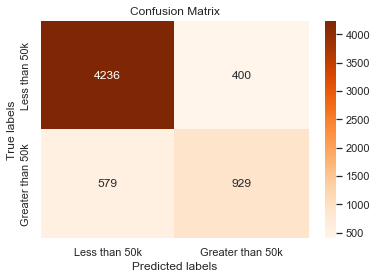

In [30]:
#Show Confusion Matrix for base model
conf_matrix = confusion_matrix(test_actuals, test_predictions)

plot_confusion_matrix(conf_matrix)

###### Model Tuning

In [31]:
#define parameter grid to do randomizedsearchcv
param_grid = { 
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10, 15, 100],
    'max_depth' : [1,2,5,10,25,50,100,None],
    'criterion' :['gini', 'entropy'],
    'bootstrap': [True,False]
}

#perform randomsearch
rfc_tuned = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=25, scoring='recall', cv= 5, random_state=2)

#set datatime to time how long search takes
d1 = datetime.datetime.now()

#fit randomsearch model
rfc_tuned.fit(x_train, y_train)

#get time after run and print runtime
d2 = datetime.datetime.now()
elapsedtime = d2-d1
runtime = elapsedtime / datetime.timedelta(minutes=1)
print(f"{runtime: .2f}")

 14.38


In [32]:
#Get best parameters
rfc_tuned.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': False}

In [33]:
#Get tuned predictions
test_tuned_predictions = get_predictions(x_test, rfc_tuned)

In [34]:
#Run metrics to see how much better tuned model is than the default
#Need to also consider runtime of tuning model vs. marginal improvement

print(f'Tuned Accuracy Score: {accuracy_score(test_actuals, test_tuned_predictions)}')
print(f'Tuned Recall: {recall_score(test_actuals, test_tuned_predictions)}')
print(f'Tuned Precision: {precision_score(test_actuals, test_tuned_predictions)}')

Tuned Accuracy Score: 0.8541666666666666
Tuned Recall: 0.6419098143236074
Tuned Precision: 0.7311178247734139
